
## Overview

Online retail data analysis is an iterative process, and insights gained from the analysis should be used to drive business decisions and improve overall performance. 

This notebook is written in **Python** so the default cell type is Python. 

In [0]:
# File location and type
file_location = "/FileStore/tables/data-1.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)
df.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType
from pyspark.sql.functions import col, isnan, when, count, udf, year, month, to_date, mean
import pyspark.sql.functions as F
import seaborn as sns
import matplotlib.pyplot as plt

# Create my_spark
spark = SparkSession.builder.getOrCreate()
print(spark)

In [0]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)



In [0]:
def quick_overview(df):
   # display the spark dataframe
   print("FIRST RECORDS")
   print(df.limit(2).sort(col("InvoiceDate"), ascending=True).toPandas())

   # count null values
   print("COUNT NULL VALUES")
   print(df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c, y in df.dtypes if y in ["double", "float"]]
      ).toPandas())

   # check for dublicates
   dublicates = df.groupby(df.Description) \
    .count() \
    .where('count > 1') \
    .limit(5).toPandas()
   print("DUPLICATES")
   print(dublicates)

   # print schema
   print("PRINT SCHEMA")
   print(df.printSchema())

quick_overview(df)

FIRST RECORDS
  InvoiceNo StockCode                         Description Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                 WHITE METAL LANTERN        6   

      InvoiceDate UnitPrice CustomerID         Country  
0  12/1/2010 8:26      2.55      17850  United Kingdom  
1  12/1/2010 8:26      3.39      17850  United Kingdom  
COUNT NULL VALUES
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[541909 rows x 0 columns]
DUPLICATES
                          Description  count
0              10 COLOUR SPACEBOY PEN    327
1  SET/10 BLUE POLKADOT PAR

In [0]:
unique_desc.show()

+--------------------+
|         Description|
+--------------------+
|ASSORTED COLOUR B...|
|FELTCRAFT PRINCES...|
| WHITE METAL LANTERN|
|CREAM CUPID HEART...|
|GLASS STAR FROSTE...|
|HAND WARMER UNION...|
|BOX OF VINTAGE JI...|
|POPPY'S PLAYHOUSE...|
|RED WOOLLY HOTTIE...|
|POPPY'S PLAYHOUSE...|
|HOME BUILDING BLO...|
|RECIPE BOX WITH M...|
|HAND WARMER RED P...|
|BOX OF 6 ASSORTED...|
|LOVE BUILDING BLO...|
|IVORY KNITTED MUG...|
|BOX OF VINTAGE AL...|
|WHITE HANGING HEA...|
| DOORMAT NEW ENGLAND|
|KNITTED UNION FLA...|
+--------------------+
only showing top 20 rows



In [0]:
data_sample = df.toPandas().loc[:50,]

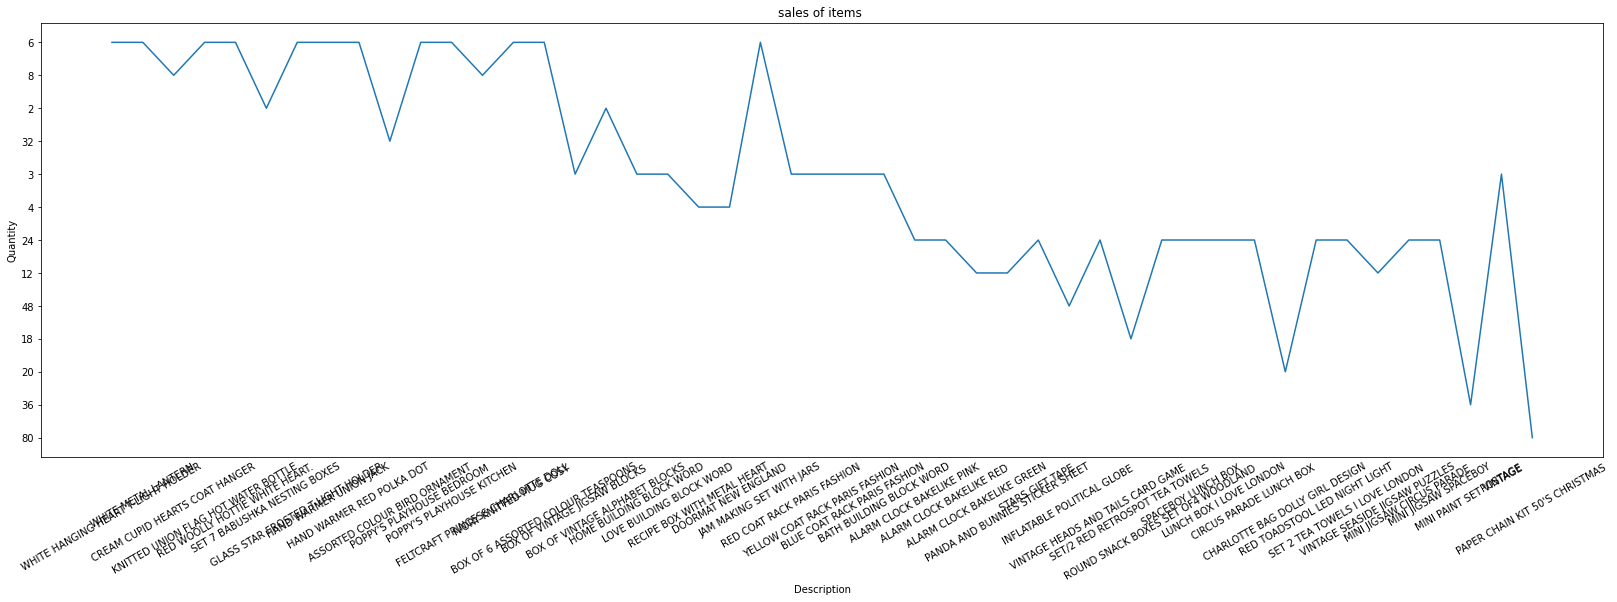

In [0]:
fig, ax = plt.subplots(figsize=(28,8))
sns.lineplot(y="Quantity", x="Description", data=data_sample, palette="Spectral_r")

# plot formatting 
ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)

# title formatting

ax.set_title("sales of items ")
plt.xlabel("Description")
plt.show()

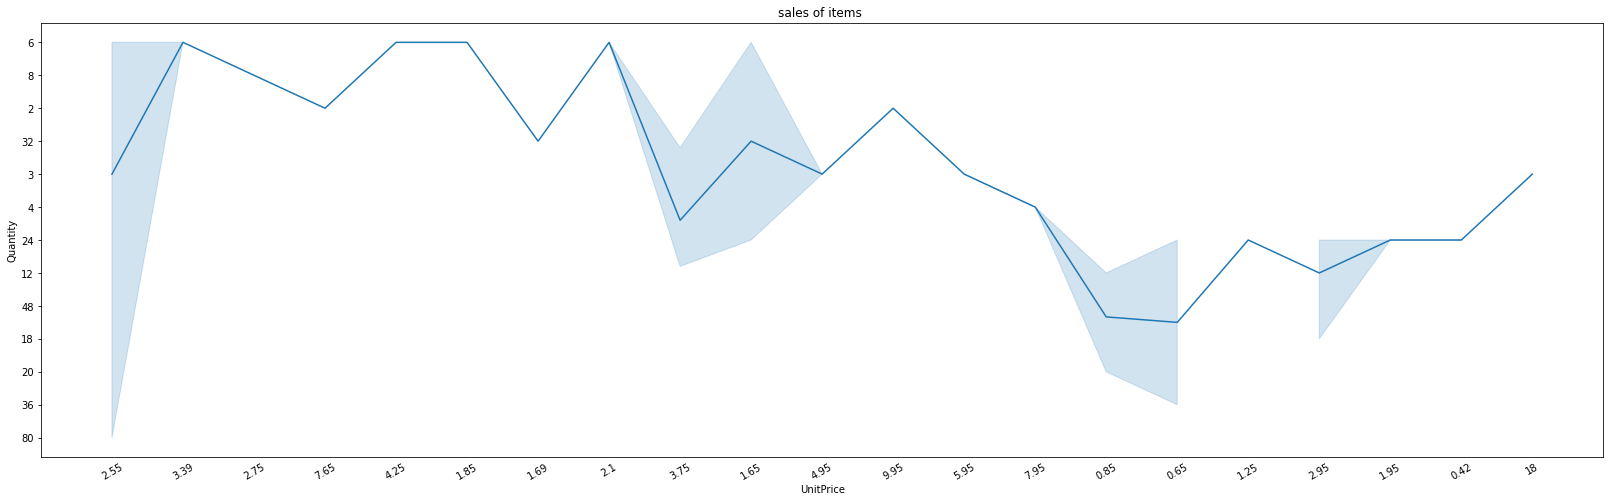

In [0]:
fig, ax = plt.subplots(figsize=(28,8))
sns.lineplot(y="Quantity", x="UnitPrice", data=data_sample, palette="Spectral_r")

# plot formatting 
ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)

# title formatting

ax.set_title("sales of items ")
plt.xlabel("UnitPrice")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Out[32]: Text(0.5, 1.0, 'between Qunatity and Unit Price')

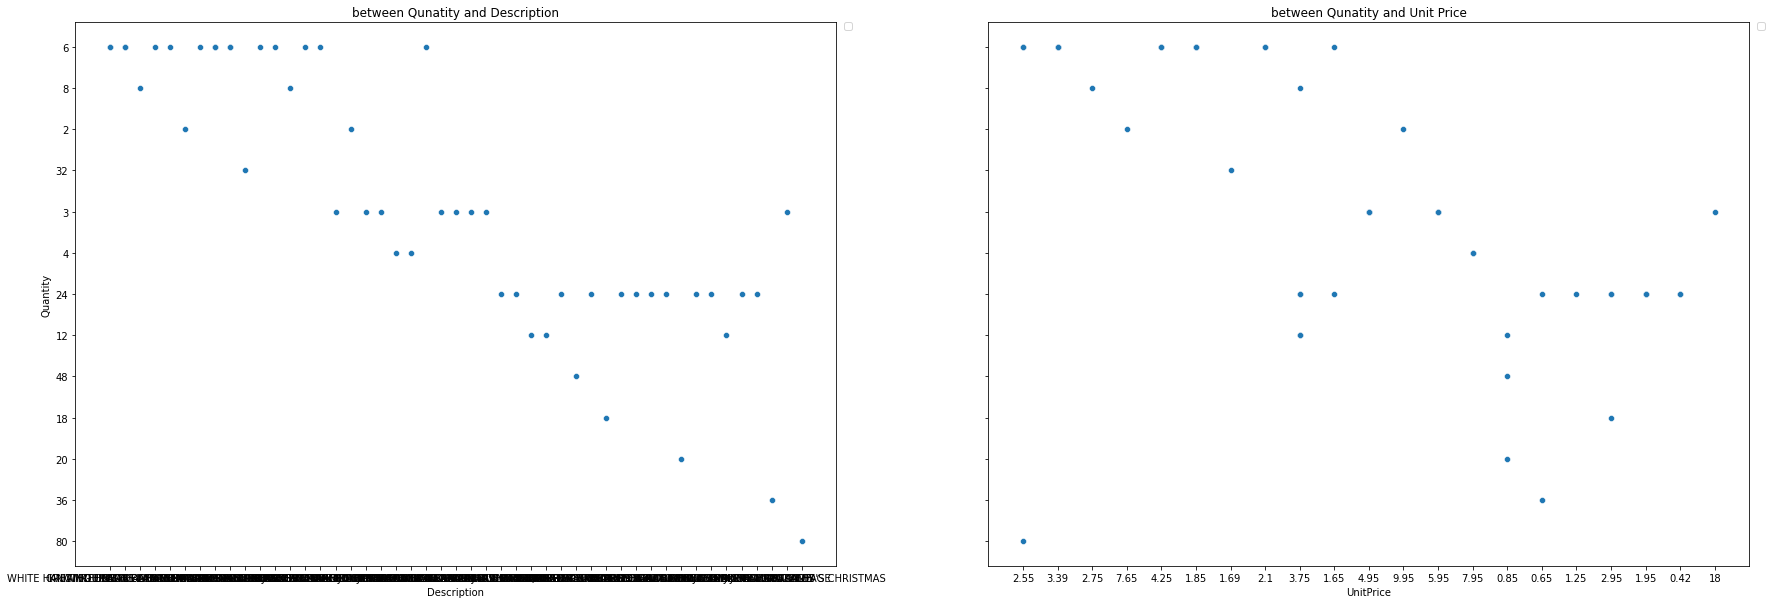

In [0]:
fig, axes= plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

palette = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.scatterplot(ax = axes[0],  y="Quantity", x="Description", data=data_sample, alpha=1.0, palette=palette)
axes[0].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
axes[0].set_title("between Qunatity and Description")

sns.scatterplot(ax = axes[1],  y="Quantity", x="UnitPrice", data=data_sample, alpha=1.0, palette='rocket_r')
axes[1].legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
axes[1].set_title("between Qunatity and Unit Price")



In [0]:
from pyspark.sql.functions import col, sum as spark_sum

# Assuming df is your DataFrame
null_counts = df.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|       1454|       0|          0|        0|    135080|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+



In [0]:
df_new = df.dropna()

In [0]:
df_new.show()

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|    22752|SET 7 BABUSHKA NE...|       2|12/1/2010 8:26|     7.65|     17850|United Kingdom|
|   536365|    21730|GLASS STAR FROSTE...|       6|12/1/2010 8:26|     4.

In [0]:
null_counts = df_new.select([spark_sum(col(column).isNull().cast("int")).alias(column) for column in df.columns])
null_counts.show()

+---------+---------+-----------+--------+-----------+---------+----------+-------+
|InvoiceNo|StockCode|Description|Quantity|InvoiceDate|UnitPrice|CustomerID|Country|
+---------+---------+-----------+--------+-----------+---------+----------+-------+
|        0|        0|          0|       0|          0|        0|         0|      0|
+---------+---------+-----------+--------+-----------+---------+----------+-------+

